<a href="https://colab.research.google.com/github/JoDeMiro/Ember/blob/main/Fuzzy_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://www.youtube.com/watch?v=g4wdmFYZ-h4

In [ ]:
!pip install scikit-fuzzy

     |████████████████████████████████| 1.0MB 5.3MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp37-none-any.whl size=894069 sha256=4601d7862d3d5a77c9617bd83af6718dd3fa83669a9def7138002f8405a6179e
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
suhu_udara = ctrl.Antecedent(np.arange(0,38, 1), 'suhu_udara')
kelebaban = ctrl.Antecedent(np.arange(0,71,1), 'kelembaban')
durasi = ctrl.Consequent(np.arange(0, 91, 1), 'durasi')

In [ ]:
suhu_udara['cool'] = fuzz.trimf(suhu_udara.universe, [0, 7.5, 15])
suhu_udara['normal'] = fuzz.trimf(suhu_udara.universe, [11, 18.5, 26])
suhu_udara['hot'] = fuzz.trimf(suhu_udara.universe, [22, 29.5, 37])

In [ ]:
kelebaban['dry'] = fuzz.trimf(kelebaban.universe, [0,10,20])
kelebaban['moist'] = fuzz.trimf(kelebaban.universe, [15,32.5,50])
kelebaban['wet'] = fuzz.trimf(kelebaban.universe, [40,55,70])

In [ ]:
durasi['short'] = fuzz.trimf(durasi.universe, [0,14,28])
durasi['medium'] = fuzz.trimf(durasi.universe, [20,34,48])
durasi['long'] = fuzz.trimf(durasi.universe, [40,65,90])

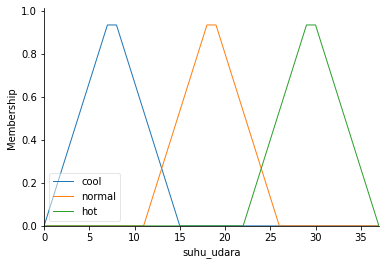

In [ ]:
suhu_udara.view()

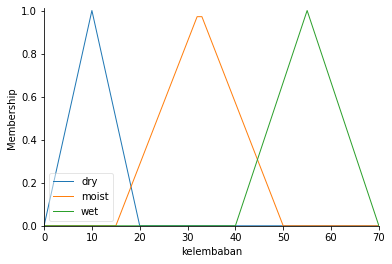

In [ ]:
kelebaban.view()

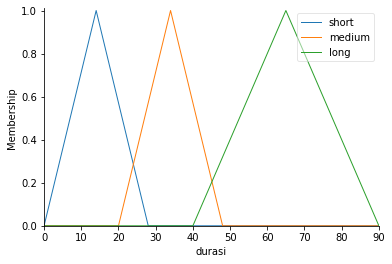

In [ ]:
durasi.view()

In [ ]:
rule1 = ctrl.Rule(suhu_udara['hot'] | kelebaban['dry'], durasi['long'])
rule2 = ctrl.Rule(suhu_udara['hot'] | kelebaban['moist'], durasi['medium'])
rule3 = ctrl.Rule(suhu_udara['normal'] | kelebaban['dry'], durasi['long'])
rule4 = ctrl.Rule(suhu_udara['normal'] | kelebaban['moist'], durasi['medium'])

In [ ]:
penyirman_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])

In [ ]:
penyirman = ctrl.ControlSystemSimulation(penyirman_ctrl)

In [ ]:
penyirman.input['suhu_udara'] = 35
penyirman.input['kelembaban'] = 17

In [ ]:
penyirman.compute()

59.71109010116286


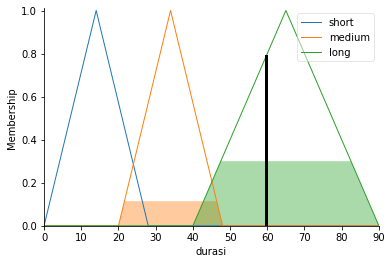

In [ ]:
print(penyirman.output['durasi'])

durasi.view(sim=penyirman)